In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [73]:
X, y = make_blobs(n_samples=250, centers=2, random_state=42, cluster_std=1.5)

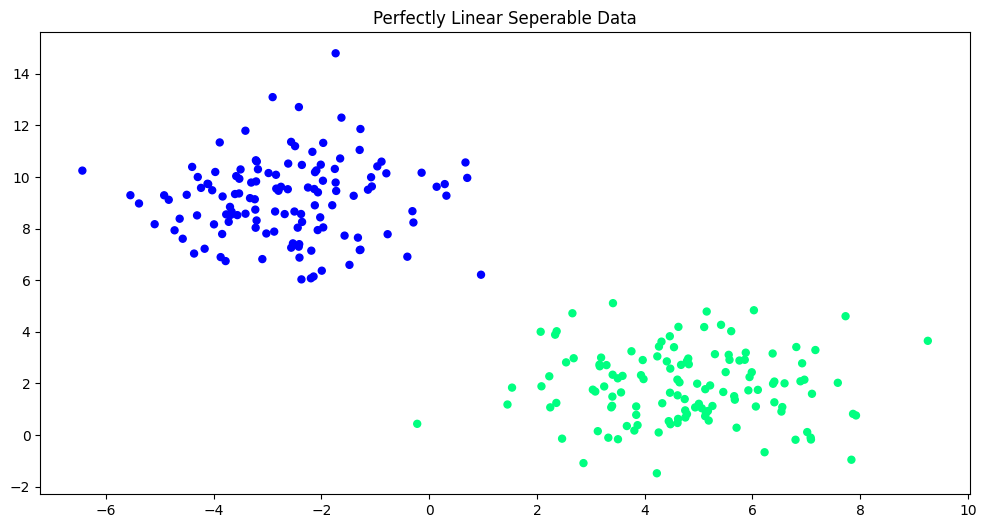

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='winter')
plt.title("Perfectly Linear Seperable Data")
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
svc = SVC(kernel='linear', C=1e3)

svc.fit(X_train, y_train)

SVC(C=1000.0, kernel='linear')

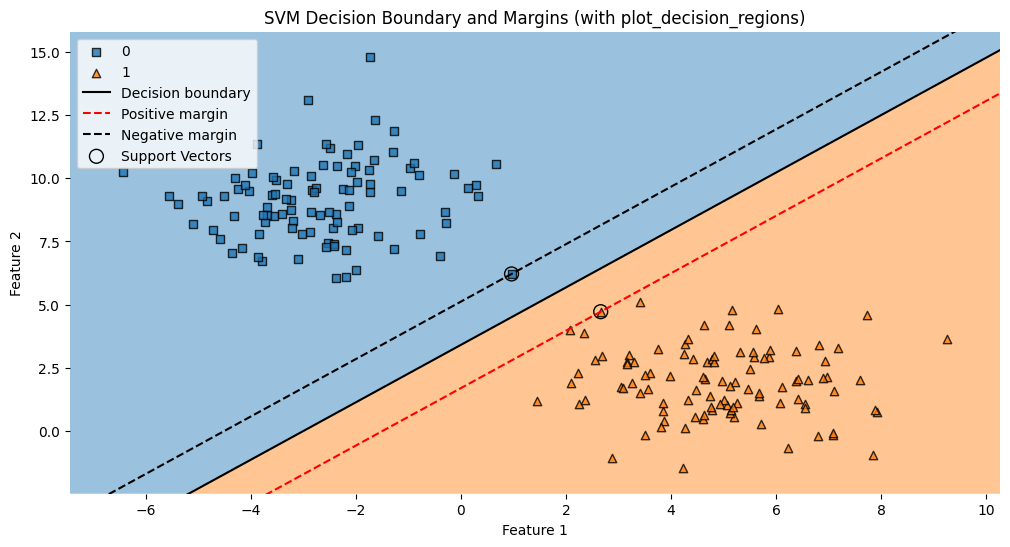

In [77]:
# Extract model parameters
w = svc.coef_[0]
b = svc.intercept_[0]

# Define X-range for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)

# Compute the three lines
yy = - (w[0] * xx + b) / w[1]             # decision boundary
yy_margin_pos = - (w[0] * xx + b - 1) / w[1]  # positive margin
yy_margin_neg = - (w[0] * xx + b + 1) / w[1]  # negative margin

# Plot decision regions
plt.figure(figsize=(12, 6))
plot_decision_regions(X_train, y_train, clf=svc, legend=2)

# Overlay the lines
plt.plot(xx, yy, 'k-', label='Decision boundary')
plt.plot(xx, yy_margin_pos, 'r--', label='Positive margin')
plt.plot(xx, yy_margin_neg, 'k--', label='Negative margin')

# Highlight support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVM Decision Boundary and Margins (with plot_decision_regions)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()